In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

plt.rc('font',family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv('총데이터4월_1월.csv')
df.index = pd.to_datetime(df['date'])
df= df.drop(['date'], axis=1)
df.rename(columns={'P(kw)':'P'},inplace=True)
df

FileNotFoundError: ignored

In [ ]:
#하루 단위
df_resample = df.resample(rule='10T').mean()
df_resample

,soc,dcA,dcV,minTemp,maxTemp,차이*총량,P,temp
date,,,,,,,,
2021-04-09 00:00:00,64.0,-0.01,754.57,23.0,24.0,0.0,-0.007545,23.5
2021-04-09 00:10:00,64.0,-0.05,754.52,23.0,24.0,0.0,-0.037725,23.5
2021-04-09 00:20:00,64.0,-0.02,754.55,23.0,24.0,0.0,-0.015090,23.5
2021-04-09 00:30:00,64.0,-0.04,754.53,23.0,24.0,0.0,-0.030181,23.5
2021-04-09 00:40:00,64.0,-0.02,754.51,23.0,24.0,0.0,-0.015090,23.5
...,...,...,...,...,...,...,...,...
2022-01-28 06:10:00,40.0,0.23,717.69,21.0,20.0,0.0,0.165069,20.5
2022-01-28 06:20:00,40.0,0.24,717.68,21.0,20.0,0.0,0.172244,20.5
2022-01-28 06:30:00,40.0,0.25,717.62,21.0,20.0,0.0,0.179404,20.5


In [ ]:
#기술통계량
df.describe()
#mean: 평균값, std: 표준편차,

,soc,dcA,dcV,minTemp,maxTemp,차이*총량,P,temp
count,351829.000000,351829.000000,351829.000000,351829.000000,351829.000000,351829.000000,351829.000000,351829.000000
mean,20.093938,0.091301,677.782278,22.437323,22.125075,-0.000092,0.083900,22.281199
std,16.463198,7.790700,32.560036,2.147537,2.485265,0.183832,5.456595,2.068078
min,5.000000,-30.000000,624.500000,16.000000,13.000000,-38.304000,-20.154000,14.500000
25%,9.000000,-0.100000,653.800000,21.000000,21.000000,0.000000,-0.065120,21.000000
50%,9.000000,0.100000,658.800000,22.000000,22.000000,0.000000,0.065210,22.500000
75%,37.000000,0.200000,714.300000,24.000000,23.000000,0.000000,0.130820,23.500000
max,81.000000,44.700000,785.400000,34.000000,32.000000,5.985000,29.893780,31.500000


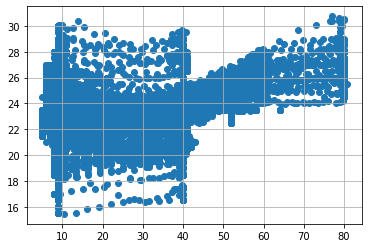

In [ ]:
# plt.scatter(df_resample.index,df_resample['soc'])
plt.scatter(df_resample['soc'],df_resample['temp'])
plt.grid()
plt.show()

In [ ]:
df_resample.corr()

,soc,dcA,dcV,minTemp,maxTemp,차이*총량,P,temp
soc,1.000000,0.115570,0.976696,0.178850,0.491547,0.104694,0.122019,0.385350
dcA,0.115570,1.000000,0.137684,-0.047576,-0.102383,0.855321,0.999658,-0.085488
dcV,0.976696,0.137684,1.000000,0.170279,0.426439,0.122728,0.144908,0.341959
minTemp,0.178850,-0.047576,0.170279,1.000000,0.632715,-0.044107,-0.037132,0.885576
maxTemp,0.491547,-0.102383,0.426439,0.632715,1.000000,-0.092680,-0.095007,0.920015
차이*총량,0.104694,0.855321,0.122728,-0.044107,-0.092680,1.000000,0.854639,-0.077912
P,0.122019,0.999658,0.144908,-0.037132,-0.095007,0.854639,1.000000,-0.075778
temp,0.385350,-0.085488,0.341959,0.885576,0.920015,-0.077912,-0.075778,1.000000


In [ ]:
#월별 상관계수
pr_m = pd.period_range(start = '2021-04',
                       end= None,
                       periods =10,
                      freq= 'M')
pr_m


PeriodIndex(['2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09',
             '2021-10', '2021-11', '2021-12', '2022-01'],
            dtype='period[M]')

In [ ]:
res = ols('maxTemp~soc', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                maxTemp   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                 7.458e+04
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        04:59:23   Log-Likelihood:            -7.8570e+05
No. Observations:              351829   AIC:                         1.571e+06
Df Residuals:                  351827   BIC:                         1.571e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.8565      0.006   3473.004      0.000      20.845      20.868
soc            0.0631      0.000    273.088      0.000       0.063       0.064
==============================================================================
Omnibus:                     6720.463   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7249.280
Skew:                           0.325   Prob(JB):                         0.00
Kurtosis:                       3.266   Cond. No.                         41.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""